In [1]:
import os
import tensorflow as tf
import shutil
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from shutil import copyfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.utils import shuffle

In [2]:
print("The number of images with facemask:",len(os.listdir('data/with_mask')))
print("The number of images without facemask:",len(os.listdir('data/without_mask')))
IMG_HEIGHT = 150
IMG_WIDTH = 150

The number of images with facemask: 690
The number of images without facemask: 686


In [3]:
def train_test_split(source, trainPath, testPath, split_size):
	dataset = []
	for crnImage in os.listdir(source):
		data = source + '/' + crnImage
		if(os.path.getsize(data) > 0):
			dataset.append(crnImage)
	train_len = int(len(dataset) * split_size)
	test_len = int(len(dataset) - train_len)
	shuffled = random.sample(dataset, len(dataset))
	train = dataset[0:train_len]
	test = dataset[train_len:len(dataset)]
	print("train images with mask:",len(train))
	print("test images without mask:",len(test))

  #copying train and test images in seaparate directories
	for trainDataPoint in train: 
		crnTrainDataPath = source + '/' + trainDataPoint
		newTrainDataPath =  trainPath + '/' + trainDataPoint
		copyfile(crnTrainDataPath, newTrainDataPath)

	for testDataPoint in test:
		crnTestDataPath = source + '/' + testDataPoint
		newTestDataPath =  testPath + '/' + testDataPoint
		copyfile(crnTestDataPath, newTestDataPath)


In [4]:
model = tf.keras.models.Sequential([
    Conv2D(100, (3,3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(2,2),
    
    Conv2D(100, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dropout(0.5),
    Dense(50, activation='relu'),
    Dense(2, activation='softmax')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [5]:
acc = 0
val_loss = 0
val_acc = 0
loss = 0
val_loss = 0
epochs = 30

In [6]:
def trainModel():
  training_dir = "data/train"
  train_datagen = ImageDataGenerator(rescale=1.0/255,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

  train_generator = train_datagen.flow_from_directory(training_dir, 
                                                      batch_size=10, 
                                                      target_size=(IMG_WIDTH, IMG_HEIGHT))
  validation_dir = "data/test"
  validation_datagen = ImageDataGenerator(rescale=1.0/255)
  validation_generator = validation_datagen.flow_from_directory(validation_dir, 
                                                           batch_size=10, 
                                                           target_size=(IMG_WIDTH, IMG_HEIGHT))
#   checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

  history = model.fit_generator(train_generator,
                                epochs=epochs,
                                validation_data=validation_generator,
                                # callbacks=[checkpoint]
                                )
  global acc
  acc = history.history['accuracy']
  global val_acc
  val_acc = history.history['val_accuracy']
  global loss
  loss = history.history['loss']
  global val_loss
  val_loss = history.history['val_loss']

  model.save("mask_detector.model", save_format="h5")

In [7]:
def plot():
  epochs_range = range(epochs)
  plt.figure(figsize=(6, 6))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.show()

In [8]:
!mkdir data/train/ data/train/with_mask/ data/train/without_mask/ data/test data/test/with_mask/ data/test/without_mask/

In [8]:

train_test_split('data/with_mask', 'data/train/with_mask', 'data/test/with_mask',0.8)
train_test_split('data/without_mask','data/train/without_mask', 'data/test/without_mask',0.8)

train images with mask: 552
test images without mask: 138
train images with mask: 548
test images without mask: 138


Found 1100 images belonging to 2 classes.
Found 276 images belonging to 2 classes.
Epoch 1/30
110/110 [==============================] - 104s 932ms/step - loss: 0.7621 - accuracy: 0.6662 - val_loss: 0.2779 - val_accuracy: 0.8768
Epoch 2/30
110/110 [==============================] - 100s 910ms/step - loss: 0.3361 - accuracy: 0.8755 - val_loss: 0.2825 - val_accuracy: 0.9022
Epoch 3/30
110/110 [==============================] - 100s 906ms/step - loss: 0.2793 - accuracy: 0.8923 - val_loss: 0.1698 - val_accuracy: 0.9167
Epoch 4/30
110/110 [==============================] - 99s 901ms/step - loss: 0.2452 - accuracy: 0.9031 - val_loss: 0.1350 - val_accuracy: 0.9529
Epoch 5/30
110/110 [==============================] - 99s 900ms/step - loss: 0.2035 - accuracy: 0.9257 - val_loss: 0.1092 - val_accuracy: 0.9601
Epoch 6/30
110/110 [==============================] - 99s 896ms/step - loss: 0.2145 - accuracy: 0.9144 - val_loss: 0.1355 - val_accuracy: 0.9529
Epoch 7/30
110/110 [========================

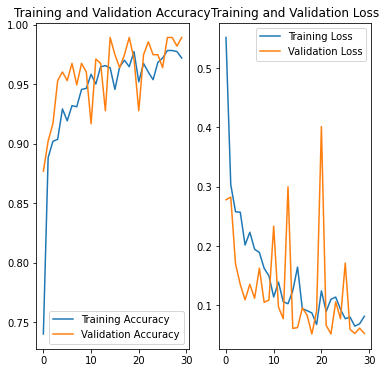

In [9]:
trainModel()
plot()